In [18]:
# Dependencies and Setup
import pandas as pd
import seaborn as sns
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

# File to Load
file_to_load = "../Resources/US_Unemployment-state.csv"

headers =['state','filed_week_ended','initial_claim','reflecting_week_ended','continued_claims','covered_employment','insured_unemployment_rate']
dtypes = { 'state':np.str_, 'initial_claim':np.float32,'continued_claims':np.float32,'covered_employment':np.float32,'insured_unemployment_rate':np.float32}
parse_dates = ['filed_week_ended','reflecting_week_ended']

# Read file and store into Pandas data frame
df = pd.read_csv(file_to_load,names=headers, dtype=dtypes,parse_dates=parse_dates,skiprows=1)

# Output File (CSV)
output_data_file = "Resources/cleaned_data.csv"

# Preview of the DataFrame
df.head()

,state,filed_week_ended,initial_claim,reflecting_week_ended,continued_claims,covered_employment,insured_unemployment_rate
0,Alabama,2015-01-03,7785.0,2014-12-27,30194.0,1794067.0,1.68
1,Alabama,2015-01-10,9139.0,2015-01-03,35246.0,1798083.0,1.96
2,Alabama,2015-01-17,4654.0,2015-01-10,28200.0,1798083.0,1.57
3,Alabama,2015-01-24,3284.0,2015-01-17,26222.0,1798083.0,1.46
4,Alabama,2015-01-31,3203.0,2015-01-24,25391.0,1798083.0,1.41


In [19]:
# Check for correct data types - need to convert
df.dtypes

state                                object
filed_week_ended             datetime64[ns]
initial_claim                       float32
reflecting_week_ended        datetime64[ns]
continued_claims                    float32
covered_employment                  float32
insured_unemployment_rate           float32
dtype: object

In [20]:
# # Remove commas from columns to be able to cast as a number
# df["Initial Claims"] = df["Initial Claims"].str.replace(',', '')
# df["Continued Claims"] = df["Continued Claims"].str.replace(',', '')
# df["Covered Employment"] = df["Covered Employment"].str.replace(',', '')

In [21]:
# # Convert data types
# df['Initial Claims'] = pd.to_numeric(df['Initial Claims'])
# df['Continued Claims'] = pd.to_numeric(df['Continued Claims'])
# df['Covered Employment'] = pd.to_numeric(df['Covered Employment'])

In [22]:
# Verify adjusted data types
df.dtypes

state                                object
filed_week_ended             datetime64[ns]
initial_claim                       float32
reflecting_week_ended        datetime64[ns]
continued_claims                    float32
covered_employment                  float32
insured_unemployment_rate           float32
dtype: object

In [23]:
# Check column names for spaces - looks good
df.columns

Index(['state', 'filed_week_ended', 'initial_claim', 'reflecting_week_ended',
       'continued_claims', 'covered_employment', 'insured_unemployment_rate'],
      dtype='object')

In [24]:
# Identify incomplete rows
df.count()

state                        14893
filed_week_ended             14893
initial_claim                14893
reflecting_week_ended        14893
continued_claims             14893
covered_employment           14893
insured_unemployment_rate    14893
dtype: int64

In [25]:
# Drop all rows with missing information
# df = unemployment_df.dropna(how='any')

In [26]:
# Verify dropped rows
df.count()

state                        14893
filed_week_ended             14893
initial_claim                14893
reflecting_week_ended        14893
continued_claims             14893
covered_employment           14893
insured_unemployment_rate    14893
dtype: int64

In [27]:
# Check states values
df['state'].value_counts()

Montana                 281
Minnesota               281
Utah                    281
Mississippi             281
Maine                   281
Kansas                  281
Colorado                281
Rhode Island            281
Arkansas                281
District of Columbia    281
Washington              281
Louisiana               281
Missouri                281
Alabama                 281
Virginia                281
South Carolina          281
Wisconsin               281
New York                281
Michigan                281
South Dakota            281
Illinois                281
Puerto Rico             281
New Hampshire           281
Florida                 281
New Mexico              281
Idaho                   281
Oklahoma                281
Delaware                281
North Dakota            281
Oregon                  281
Pennsylvania            281
Nevada                  281
California              281
North Carolina          281
Tennessee               281
Kentucky            

In [28]:
# Display a statistical overview for a high level insight into the data
df.describe()

,initial_claim,continued_claims,covered_employment,insured_unemployment_rate
count,1.489300e+04,1.489300e+04,14893.00,14893.000000
mean,6.839409e+03,4.453886e+04,2642390.00,1.626655
std,2.361019e+04,1.044609e+05,2998995.75,1.898211
min,0.000000e+00,0.000000e+00,32446.00,0.000000
25%,1.090000e+03,8.645000e+03,652934.00,0.850000
50%,2.538000e+03,1.983000e+04,1797624.00,1.240000
75%,5.572000e+03,3.968200e+04,3266242.00,1.820000
max,1.058325e+06,4.808361e+06,17330010.00,31.200001


## BAR CHART

In [29]:
df['File_Month'] = df['filed_week_ended'].dt.month
df['File_Day'] = df['filed_week_ended'].dt.day
df['File_Year'] = df['filed_week_ended'].dt.year

In [30]:
df.head()

,state,filed_week_ended,initial_claim,reflecting_week_ended,continued_claims,covered_employment,insured_unemployment_rate,File_Month,File_Day,File_Year
0,Alabama,2015-01-03,7785.0,2014-12-27,30194.0,1794067.0,1.68,1,3,2015
1,Alabama,2015-01-10,9139.0,2015-01-03,35246.0,1798083.0,1.96,1,10,2015
2,Alabama,2015-01-17,4654.0,2015-01-10,28200.0,1798083.0,1.57,1,17,2015
3,Alabama,2015-01-24,3284.0,2015-01-17,26222.0,1798083.0,1.46,1,24,2015
4,Alabama,2015-01-31,3203.0,2015-01-24,25391.0,1798083.0,1.41,1,31,2015


In [31]:
year_df = df.groupby(['File_Year'])
year_df.count().head(10)

,state,filed_week_ended,initial_claim,reflecting_week_ended,continued_claims,covered_employment,insured_unemployment_rate,File_Month,File_Day
File_Year,,,,,,,,,
2015,2756,2756,2756,2756,2756,2756,2756,2756,2756
2016,2809,2809,2809,2809,2809,2809,2809,2809,2809
2017,2756,2756,2756,2756,2756,2756,2756,2756,2756
2018,2756,2756,2756,2756,2756,2756,2756,2756,2756
2019,2756,2756,2756,2756,2756,2756,2756,2756,2756
2020,1060,1060,1060,1060,1060,1060,1060,1060,1060


In [32]:
iclaims_sum = year_df['initial_claim'].sum()


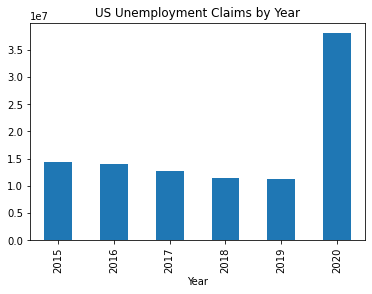

In [34]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
iclaims_sum.plot(kind ="bar", title = "US Unemployment Claims by Year")

# Label x-axis
plt.xlabel("Year")

# Show pandas bar plot
plt.show()